In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
covid=pd.read_csv("covid_19_india.csv")
covid.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3
6,7,05/02/20,6:00 PM,Kerala,3,0,0,0,3
7,8,06/02/20,6:00 PM,Kerala,3,0,0,0,3
8,9,07/02/20,6:00 PM,Kerala,3,0,0,0,3
9,10,08/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1254 non-null   int64 
 1   Date                      1254 non-null   object
 2   Time                      1254 non-null   object
 3   State/UnionTerritory      1254 non-null   object
 4   ConfirmedIndianNational   1254 non-null   object
 5   ConfirmedForeignNational  1254 non-null   object
 6   Cured                     1254 non-null   int64 
 7   Deaths                    1254 non-null   int64 
 8   Confirmed                 1254 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 88.3+ KB


In [ ]:
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,1254.000000,1254.000000,1254.000000,1254.000000
mean,627.500000,24.524721,5.771930,186.789474
std,362.142928,72.485487,22.301403,485.907171
min,1.000000,0.000000,0.000000,0.000000
25%,314.250000,0.000000,0.000000,3.000000
50%,627.500000,1.000000,0.000000,18.000000
75%,940.750000,14.000000,3.000000,109.750000
max,1254.000000,789.000000,269.000000,5652.000000


In [ ]:
vaccine=pd.read_csv("covid_vaccine_statewise.csv")
vaccine.head(7)

,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,India,48276.0,48276.0,0.0
1,17/01/2021,India,58604.0,58604.0,0.0
2,18/01/2021,India,99449.0,99449.0,0.0
3,19/01/2021,India,195525.0,195525.0,0.0
4,20/01/2021,India,251280.0,251280.0,0.0
5,21/01/2021,India,365965.0,365965.0,0.0
6,22/01/2021,India,549381.0,549381.0,0.0


In [ ]:
covid.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [ ]:
covid.head()


,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [ ]:
covid["Active_cases"]=covid["Confirmed"]-(covid['Cured']+covid['Deaths'])
covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
1249,23/04/20,Telengana,197,24,960,739
1250,23/04/20,Tripura,1,0,2,1
1251,23/04/20,Uttarakhand,23,0,46,23
1252,23/04/20,Uttar Pradesh,187,21,1509,1301
1253,23/04/20,West Bengal,79,15,456,362


In [ ]:
top_10_actice_cases=covid.groupby(by="State/UnionTerritory").max()[["Active_cases","Date"]].sort_values(by=["Active_cases"],ascending=False).reset_index()

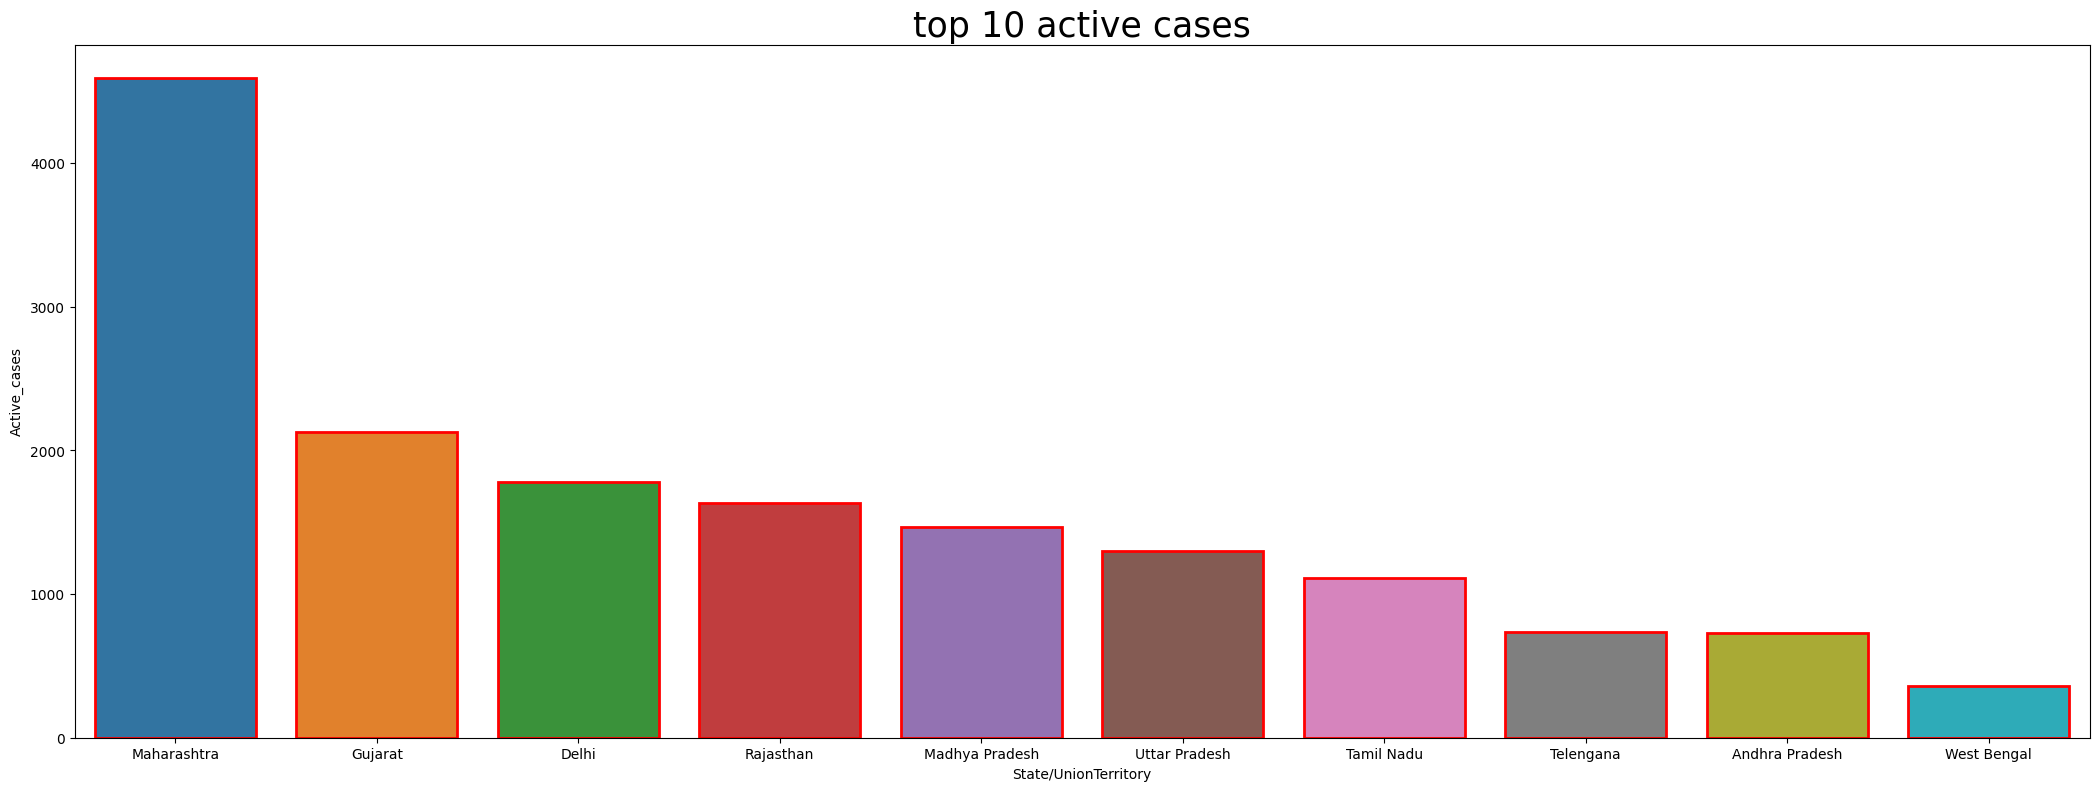

In [ ]:
fig=plt.figure(figsize=(26,9))
plt.title("top 10 active cases",size=25)
ax=sns.barplot(data=top_10_actice_cases.iloc[:10],y="Active_cases",x="State/UnionTerritory",linewidth=2,edgecolor="red")

<function matplotlib.pyplot.show(close=None, block=None)>

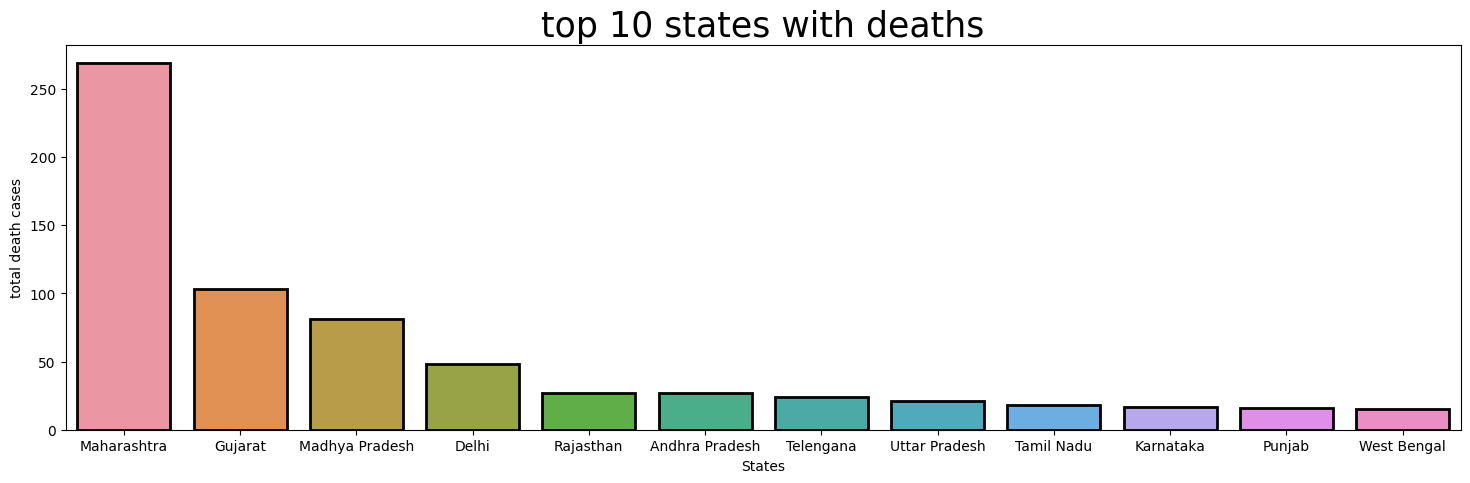

In [ ]:
top_10_deaths=covid.groupby(by="State/UnionTerritory").max()[["Deaths","Date"]].sort_values(by=["Deaths"],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("top 10 states with deaths",size=25)
ax=sns.barplot(data=top_10_deaths.iloc[:12],y="Deaths",x="State/UnionTerritory",linewidth=2,edgecolor="black")
plt.xlabel("States")
plt.ylabel("total death cases")
plt.show

In [ ]:
fig=plt.figure(figsize=(12,6))
ax = sns.lineplot(data = covid[covid['State/UnionTerritory'].isin(["Maharashtra", "Karnataka", "Kerala", "Tamil Nadu", "Uttar Pradesh"]),x = "Date", y = "Active_cases", hue = "State/UnionTerritory"])
ax.set_title("top_5_affected_states", size=16)

SyntaxError: ignored

In [ ]:
vaccine.head()

,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,India,48276.0,48276.0,0.0
1,17/01/2021,India,58604.0,58604.0,0.0
2,18/01/2021,India,99449.0,99449.0,0.0
3,19/01/2021,India,195525.0,195525.0,0.0
4,20/01/2021,India,251280.0,251280.0,0.0


In [ ]:
vaccine.rename(columns={"Updated On" : 'Vaccine_Date'},inplace=True)
vaccine.head(10)

,Vaccine_Date,State,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,India,48276.0,48276.0,0.0
1,17/01/2021,India,58604.0,58604.0,0.0
2,18/01/2021,India,99449.0,99449.0,0.0
3,19/01/2021,India,195525.0,195525.0,0.0
4,20/01/2021,India,251280.0,251280.0,0.0
5,21/01/2021,India,365965.0,365965.0,0.0
6,22/01/2021,India,549381.0,549381.0,0.0
7,23/01/2021,India,759008.0,759008.0,0.0
8,24/01/2021,India,835058.0,835058.0,0.0
9,25/01/2021,India,1277104.0,1277104.0,0.0
